We will measure the activity by counting the number of:
1. rc_comments
2. posts
3. message_posts
4. inline_notifs
made by a user. We might not want to consider the data in the orig_member database because it might be slightly inconsistent with the final table we are considering. We do not know whether that number of posts is actually what we are considering while building the adjMatrix. This is because the ironmarch dataset is quite scattered.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns

### orig_rc_comments

In [ ]:
orig_rc_comments = pd.read_csv("/content/drive/MyDrive/text gcn/csv/orig_rc_comments.csv")

In [ ]:
orig_rc_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            21 non-null     int64 
 1   rid           21 non-null     int64 
 2   comment       21 non-null     object
 3   comment_by    21 non-null     int64 
 4   comment_date  21 non-null     int64 
 5   approved      21 non-null     int64 
 6   edit_date     21 non-null     int64 
 7   author_name   21 non-null     object
 8   ip_address    21 non-null     object
dtypes: int64(6), object(3)
memory usage: 1.6+ KB


In [ ]:
orig_rc_comments['comment_by'].value_counts()

1       7
2170    4
9144    2
7       2
9475    2
49      1
2220    1
9       1
4       1
Name: comment_by, dtype: int64

In [ ]:
frame = { '#rc_comments': orig_rc_comments['comment_by'].value_counts()}
rc_comments = pd.DataFrame(frame)

In [ ]:
rc_comments 

,#rc_comments
1,7
2170,4
9144,2
7,2
9475,2
49,1
2220,1
9,1
4,1


In [ ]:
rc_comments.to_csv("/content/drive/MyDrive/text gcn/ironmarch csvs/dummy_rc_comments.csv")

In [ ]:
rc_comments = pd.read_csv("/content/drive/MyDrive/text gcn/ironmarch csvs/dummy_rc_comments.csv")

In [ ]:
rc_comments

,Unnamed: 0,#rc_comments
0,1,7
1,2170,4
2,9144,2
3,7,2
4,9475,2
5,49,1
6,2220,1
7,9,1
8,4,1


In [ ]:
rc_comments = rc_comments.rename(columns={"Unnamed: 0": "member_id"})

### orig_inline_notifications

In [ ]:
orig_inline_notifications = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_inline_notifications.csv')

In [ ]:
orig_inline_notifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47066 entries, 0 to 47065
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        47066 non-null  int64 
 1   notify_id         47066 non-null  int64 
 2   notify_to_id      47066 non-null  int64 
 3   notify_sent       47066 non-null  int64 
 4   notify_read       47066 non-null  int64 
 5   notify_title      47066 non-null  object
 6   notify_text       47066 non-null  object
 7   notify_from_id    47066 non-null  int64 
 8   notify_type_key   47066 non-null  object
 9   notify_url        47066 non-null  object
 10  notify_meta_app   33296 non-null  object
 11  notify_meta_area  33296 non-null  object
 12  notify_meta_id    47066 non-null  int64 
 13  notify_meta_key   33296 non-null  object
dtypes: int64(7), object(7)
memory usage: 5.0+ MB


In [ ]:
frame = { '#notifs': orig_inline_notifications['notify_from_id'].value_counts()}
notifs = pd.DataFrame(frame)

In [ ]:
notifs.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_notifs.csv")

In [ ]:
notifs = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_notifs.csv")

In [ ]:
notifs = notifs.rename(columns={"Unnamed: 0": "member_id"})

## orig_posts

In [ ]:
orig_posts = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_posts.csv', error_bad_lines=False)
# orig_posts = orig_posts.loc[orig_posts['author_id'].str.contains('^[0-9]*$', regex=True, na=False)]
# orig_posts['author_id'] = orig_posts['author_id'].astype('int32')
frame = { '#posts': orig_posts['author_id'].value_counts()}
posts = pd.DataFrame(frame)
posts.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
posts = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
posts = posts.rename(columns={"Unnamed: 0": "member_id"})

In [ ]:
posts

,member_id,#posts
0,1,5584
1,1558,3703
2,132,3652
3,7,3128
4,288,3059
...,...,...
729,493,1
730,9637,1
731,6139,1
732,6304,1


## orig_message_posts

In [ ]:
orig_message_posts = pd.read_csv('/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_message_posts.csv', error_bad_lines=False)
# orig_message_posts = orig_message_posts.loc[orig_message_posts['msg_author_id'].str.contains('^[0-9]*$', regex=True, na=False)]
# orig_message_posts['msg_author_id'] = orig_message_posts['msg_author_id'].astype('int32')
frame = { '#message_posts': orig_message_posts['msg_author_id'].value_counts()}
message_posts = pd.DataFrame(frame)
message_posts.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
message_posts = pd.read_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_activity_posts.csv")
message_posts = message_posts.rename(columns={"Unnamed: 0": "member_id"})

In [ ]:
message_posts

,member_id,#message_posts
0,7424,542
1,2209,487
2,7816,413
3,1,401
4,0,327
...,...,...
501,9519,1
502,7604,1
503,4339,1
504,7620,1


## Join the Columns

In [ ]:
merger1 = message_posts.merge(notifs, on="member_id", how="outer")

In [ ]:
merger1

,member_id,#message_posts,#notifs
0,7424,542.0,1157.0
1,2209,487.0,NaN
2,7816,413.0,NaN
3,1,401.0,1135.0
4,0,327.0,NaN
...,...,...,...
554,7866,NaN,1.0
555,9532,NaN,1.0
556,25,NaN,1.0
557,9869,NaN,1.0


In [ ]:
posts.shape

(734, 2)

In [ ]:
merger1.shape

(559, 3)

In [ ]:
merger2 = merger1.merge(posts, on="member_id", how="outer")

In [ ]:
merger2

,member_id,#message_posts,#notifs,#posts
0,7424,542.0,1157.0,1005.0
1,2209,487.0,NaN,83.0
2,7816,413.0,NaN,946.0
3,1,401.0,1135.0,5584.0
4,0,327.0,NaN,2768.0
...,...,...,...,...
731,252,NaN,NaN,1.0
732,493,NaN,NaN,1.0
733,6139,NaN,NaN,1.0
734,6304,NaN,NaN,1.0


In [ ]:
merger2.shape

(736, 4)

In [ ]:
# merger2.replace(to_replace=np.nan, value=0)

# Merge with orig_members

In [ ]:
orig_members = pd.read_csv("/content/drive/MyDrive/text gcn/Hackforum data/CSV Data IronMarch/data_csv/orig_members.csv")

In [ ]:
orig_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 763 non-null    int64  
 1   member_id                  763 non-null    int64  
 2   name                       763 non-null    object 
 3   member_group_id            763 non-null    int64  
 4   email                      763 non-null    object 
 5   joined                     763 non-null    int64  
 6   ip_address                 763 non-null    object 
 7   posts                      763 non-null    int64  
 8   title                      98 non-null     object 
 9   allow_admin_mails          763 non-null    int64  
 10  time_offset                755 non-null    float64
 11  skin                       271 non-null    float64
 12  warn_level                 212 non-null    float64
 13  warn_lastwarn              763 non-null    int64  

In [ ]:
orig_members.drop(orig_members.columns[[0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]], axis =1, inplace=True)

In [ ]:
orig_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   member_id              763 non-null    int64
 1   posts                  763 non-null    int64
 2   members_profile_views  763 non-null    int64
dtypes: int64(3)
memory usage: 18.0 KB


In [ ]:
db = orig_members.merge(merger2, on="member_id", how="left")

In [ ]:
db

,member_id,posts,members_profile_views,#message_posts,#notifs,#posts
0,1,5613,109177,401.0,1135.0,5584.0
1,2,1267,11420,80.0,1.0,1270.0
2,3,487,4467,49.0,3.0,484.0
3,4,1704,7483,76.0,17.0,1703.0
4,5,463,1318,1.0,NaN,459.0
...,...,...,...,...,...,...
758,9956,0,16,NaN,NaN,NaN
759,9957,0,11,NaN,NaN,NaN
760,9959,0,2,NaN,NaN,NaN
761,9958,0,36,NaN,NaN,NaN


In [ ]:
db = db.replace(to_replace=np.nan, value=0)

In [ ]:
db["total_content"] = db["#message_posts"]+	db["#notifs"]+	db["#posts"]

Text(0, 0.5, 'Count of People')

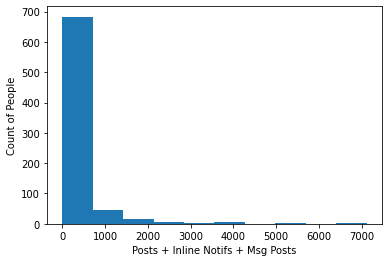

In [ ]:
plt.hist(db["total_content"])
plt.xlabel("Posts + Inline Notifs + Msg Posts")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

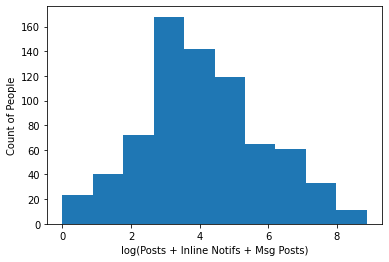

In [ ]:
plt.hist(np.log(db["total_content"].replace(to_replace=0, value=np.nan)))
plt.xlabel("log(Posts + Inline Notifs + Msg Posts)")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

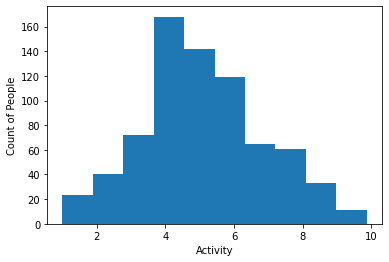

In [ ]:
db["activity"] = 1+np.log(db["total_content"].replace(to_replace=0, value=np.nan))
plt.hist(db["activity"])
plt.xlabel("Activity")
plt.ylabel("Count of People")

In [ ]:
db["n_activity"] = (db['activity']-min(db['activity']))/(max(db['activity'])-min(db['activity']))

Text(0, 0.5, 'Count of People')

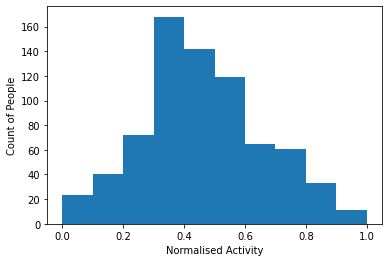

In [ ]:
plt.hist(db["n_activity"])
plt.xlabel("Normalised Activity")
plt.ylabel("Count of People")

In [ ]:
db = db.replace(to_replace=np.nan, value=0)

In [ ]:
db.to_csv("/content/drive/MyDrive/text gcn/created_csv/ironmarch/orig_score_activity.csv")

# Rough

(array([179.,  17.,   8.,   5.,   7.,   4.,   1.,   1.,   2.,   2.]),
 array([1.0000e+00, 2.3860e+02, 4.7620e+02, 7.1380e+02, 9.5140e+02,
        1.1890e+03, 1.4266e+03, 1.6642e+03, 1.9018e+03, 2.1394e+03,
        2.3770e+03]),
 <a list of 10 Patch objects>)

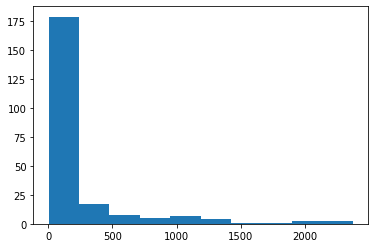

In [ ]:
plt.hist(db["#notifs"])

### Log of Each Column

(array([23., 16., 32., 31., 30., 24., 22., 18., 17., 13.]),
 array([0.        , 0.77735945, 1.55471889, 2.33207834, 3.10943779,
        3.88679723, 4.66415668, 5.44151613, 6.21887557, 6.99623502,
        7.77359447]),
 <a list of 10 Patch objects>)

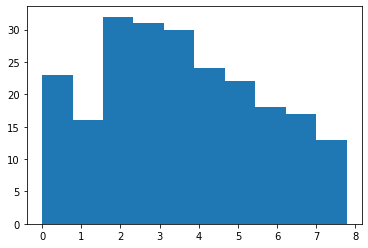

In [ ]:
plt.hist(np.log(db["#notifs"]))

(array([ 57.,  37.,  41., 115., 109.,  83.,  54.,  50.,  22.,   9.]),
 array([0.        , 0.80557925, 1.61115849, 2.41673774, 3.22231698,
        4.02789623, 4.83347547, 5.63905472, 6.44463396, 7.25021321,
        8.05579245]),
 <a list of 10 Patch objects>)

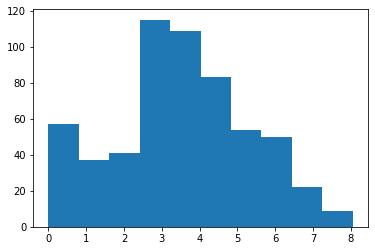

In [ ]:
plt.hist(np.log(db["#posts"]))

(array([4., 0., 0., 3., 0., 0., 0., 1., 0., 1.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

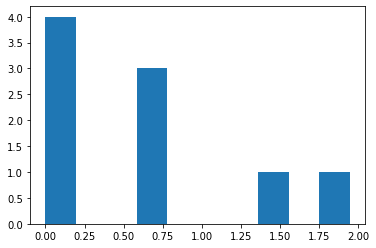

In [ ]:
plt.hist(np.log(db["#rc_comments"]))

(array([78., 93., 72., 73., 52., 58., 25., 20.,  7.,  4.]),
 array([0.        , 0.61696107, 1.23392215, 1.85088322, 2.46784429,
        3.08480537, 3.70176644, 4.31872751, 4.93568859, 5.55264966,
        6.16961073]),
 <a list of 10 Patch objects>)

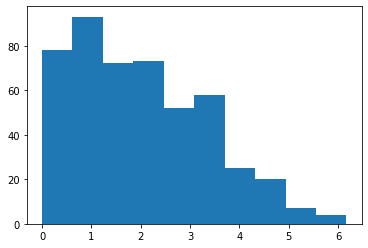

In [ ]:
plt.hist(np.log(db["#message_posts"]))

### Normalise Each Column

Text(0, 0.5, 'Count of People')

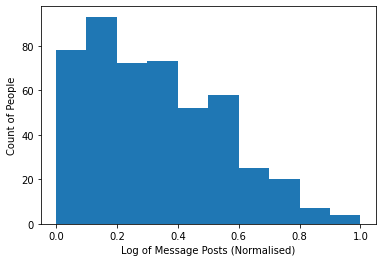

In [ ]:
plt.hist((np.log(db["#message_posts"])-np.min(np.log(db["#message_posts"])))/(np.max(np.log(db["#message_posts"]))-np.min(np.log(db["#message_posts"]))))
plt.xlabel("Log of Message Posts (Normalised)")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

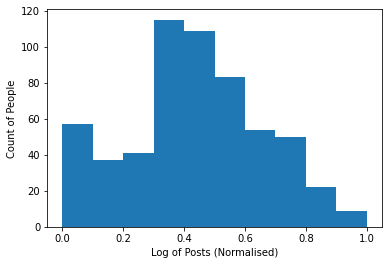

In [ ]:
plt.hist((np.log(db["#posts"])-np.min(np.log(db["#posts"])))/(np.max(np.log(db["#posts"]))-np.min(np.log(db["#posts"]))))
plt.xlabel("Log of Posts (Normalised)")
plt.ylabel("Count of People")

Text(0, 0.5, 'Count of People')

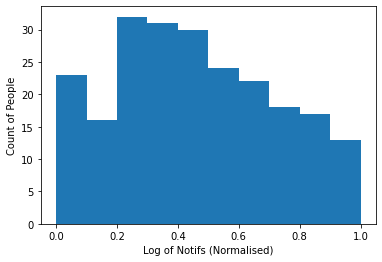

In [ ]:
plt.hist((np.log(db["#notifs"])-np.min(np.log(db["#notifs"])))/(np.max(np.log(db["#notifs"]))-np.min(np.log(db["#notifs"]))))
plt.xlabel("Log of Notifs (Normalised)")
plt.ylabel("Count of People")

In [ ]:
db["f_#notifs"] = (np.log(db["#notifs"])-np.min(np.log(db["#notifs"])))/(np.max(np.log(db["#notifs"]))-np.min(np.log(db["#notifs"])))

In [ ]:
db["f_#posts"] = (np.log(db["#posts"])-np.min(np.log(db["#posts"])))/(np.max(np.log(db["#posts"]))-np.min(np.log(db["#posts"])))

In [ ]:
db["f_#message_posts"] = (np.log(db["#message_posts"])-np.min(np.log(db["#message_posts"])))/(np.max(np.log(db["#message_posts"]))-np.min(np.log(db["#message_posts"])))

In [ ]:
db

,member_id,posts,members_profile_views,#rc_comments,#notifs,#posts,#message_posts,f_#notifs,f_#posts,f_#message_posts
0,1,5613,109177,7.0,1135.0,3152.0,381.0,0.904908,1.000000,0.963237
1,2,1267,11420,NaN,1.0,1125.0,75.0,0.000000,0.872110,0.699799
2,3,487,4467,NaN,3.0,412.0,35.0,0.141326,0.747415,0.576268
3,4,1704,7483,1.0,17.0,1401.0,66.0,0.364466,0.899346,0.679079
4,5,463,1318,NaN,NaN,457.0,1.0,NaN,0.760283,0.000000
...,...,...,...,...,...,...,...,...,...,...
758,9956,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,9957,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,9958,0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,9959,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
db.replace(to_replace=np.nan, value=0)

,member_id,posts,members_profile_views,#rc_comments,#notifs,#posts,#message_posts,f_#notifs,f_#posts,f_#message_posts
0,1,5613,109177,7.0,1135.0,3152.0,381.0,0.904908,1.000000,0.963237
1,2,1267,11420,0.0,1.0,1125.0,75.0,0.000000,0.872110,0.699799
2,3,487,4467,0.0,3.0,412.0,35.0,0.141326,0.747415,0.576268
3,4,1704,7483,1.0,17.0,1401.0,66.0,0.364466,0.899346,0.679079
4,5,463,1318,0.0,0.0,457.0,1.0,0.000000,0.760283,0.000000
...,...,...,...,...,...,...,...,...,...,...
758,9956,0,16,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
759,9957,0,11,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
760,9958,0,36,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
761,9959,0,2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
db = db.replace(to_replace=np.nan, value=0)

In [ ]:
db.to_csv("/content/drive/MyDrive/text gcn/csv/orig_score_activity.csv")